## Преобразования функций и полиномы. Домашнее задание

С помощью SymPy найдите полиномы, описывающие данные наборы точек. Затем проведите полное исследование каждого полученного полинома: проверьте четность/нечетность, найдите нули, промежутки знакопостоянства. Постройте их графики. С помощью изменения промежутка для х добейтесь того, чтобы все нули были отображены на графике функции.<br><br>
Средний уровень <br><br>
$(-2, 2), (-1, 1), (0, 0), (1, 1), (2, 2)$<br><br>
Сложный уровень <br><br>
$(-3, 33), (-2, 31), (-1, 18), (1, -18), (2, -31), (3, -33)$


In [1]:
from sympy import *
from sympy.plotting import plot
from sympy.solvers.inequalities import solve_univariate_inequality

init_printing(use_unicode=False, wrap_line=False, no_global=True)

In [23]:
# когда устал от математики и хочешь что-нибудь написать =)
def check_parity(f, symbol, values):
    is_parity = True
    if isinstance(values, int):
        return check_parity_on_one_value(f, symbol, values)
    elif isinstance(values, list) and len(values) > 0:
        is_parity, is_oddness = True, True
        for value in values:
            cur_parity, cur_oddness = check_parity_on_one_value(f, symbol, value)
            is_parity = is_parity&cur_parity
            is_oddness = is_oddness&cur_oddness
        return is_parity, is_oddness
    else:
        return False, False
            
        
def check_parity_on_one_value(f, symbol, value):
    val1 = f.subs(symbol, value)
    val2 = f.subs(symbol, (-1)*value)
    is_parity = (val1 == val2)
    is_oddness = (val1 == (-1)*val2)
    
    return is_parity, is_oddness

In [95]:
def print_params(f):
    plot(f)
    print('Нули функции')
    print(solve(f))
    for res in solve(f):
        print(res.evalf())

    print('\nПромежутки знакопостоянства: ')
    print('f > 0:', solve_univariate_inequality(f > 0, x))
    print('f < 0:', solve_univariate_inequality(f < 0, x))
    
    #is_parity, is_oddness = check_parity(f, x, [1, 5, 86])
    is_parity = (f == f.subs(x, -x))
    is_oddness = (f == (-1)*f.subs(x, -x))
    
    print(f"\nФункция {'' if is_parity else 'не '}является четной")
    print(f"\nФункция {'' if is_oddness else 'не '}является нечетной")

In [77]:
x, y = symbols('x, y', real=True)
a0, a1, a2, a3, a4, a5 = symbols('a0, a1, a2, a3, a4, a5', real=True)

In [78]:
pol_pow4 = a4*x**4 + a3*x**3 + a2*x**2 + a1*x + a0
pol_pow5 = a5*x**5 + a4*x**4 + a3*x**3 + a2*x**2 + a1*x + a0
eq_lp_pow4 = pol_pow4 - y
eq_lp_pow5 = pol_pow5 - y

In [79]:
pol_pow4

In [80]:
pol_pow5

In [81]:
list_k = (a4, a3, a2, a1, a0)
list_solve = nonlinsolve((eq_lp_pow4.subs({x: -2, y: 2}), 
            eq_lp_pow4.subs({x: -1, y: 1}), 
            eq_lp_pow4.subs({x: 0, y: 0}),
            eq_lp_pow4.subs({x: 1, y: 1}),
            eq_lp_pow4.subs({x: 2, y: 2})), list_k)
list_solve

In [82]:
f_pow4 = pol_pow4.subs(dict(zip(list_k, list_solve.args[0])))
f_pow4

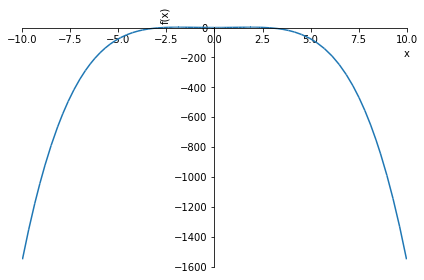

Нули функции
[0, -sqrt(7), sqrt(7)]
0
-2.64575131106459
2.64575131106459

Промежутки знакопостоянства: 
f > 0: ((0 < x) & (x < sqrt(7))) | ((x < 0) & (-sqrt(7) < x))
f < 0: (sqrt(7) < x) | (x < -sqrt(7))

Функция является четной

Функция не является нечетной


In [96]:
print_params(f_pow4)

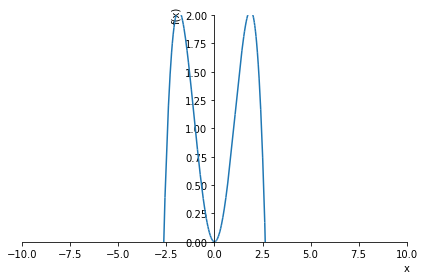

In [84]:
# посмотрим поближе на нули
plot(f_pow4, ylim=(0, 2))

In [85]:
# это, конечно, тоже можно было бы упросить передачей пар значений, которые надо подставить.
list_k = (a5, a4, a3, a2, a1, a0)
list_solve = nonlinsolve((eq_lp_pow5.subs({x: -3, y: 33}), 
            eq_lp_pow5.subs({x: -2, y: 31}), 
            eq_lp_pow5.subs({x: -1, y: 18}),
            eq_lp_pow5.subs({x: 1, y: -18}),
            eq_lp_pow5.subs({x: 2, y: -31}),
            eq_lp_pow5.subs({x: 3, y: -33})), list_k)
list_solve

In [86]:
f_pow5 = pol_pow5.subs(dict(zip(list_k, list_solve.args[0])))
f_pow5

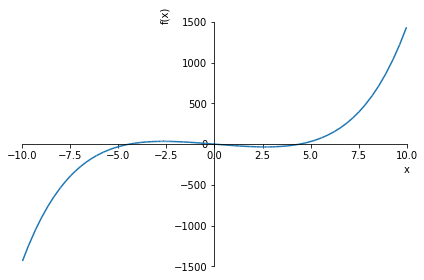

Нули функции
[0, -sqrt(-95/2 + sqrt(18049)/2), sqrt(-95/2 + sqrt(18049)/2)]
0
-4.43545751638198
4.43545751638198

Промежутки знакопостоянства: 
f > 0: (sqrt(-95/2 + sqrt(18049)/2) < x) | ((x < 0) & (-sqrt(-95/2 + sqrt(18049)/2) < x))
f < 0: (x < -sqrt(-95/2 + sqrt(18049)/2)) | ((0 < x) & (x < sqrt(-95/2 + sqrt(18049)/2)))

Функция не является четной

Функция является нечетной


In [97]:
print_params(f_pow5)